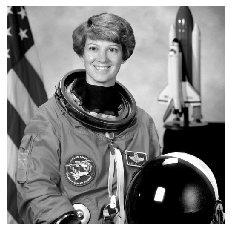

In [16]:
import cv2
import numpy as np
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY).astype(np.float)

plt.axis('off')
plt.imshow(astro ,cmap='gray')

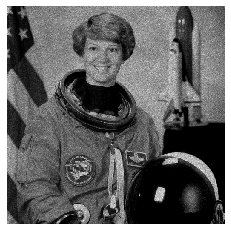

In [17]:
cnt_ratio = 0.1

# Poission Noise
astro_lowcnt = astro *cnt_ratio
poissonNoise = np.random.poisson(astro_lowcnt).astype(float)
noisyImage = astro_lowcnt + poissonNoise
plt.axis('off')
plt.imshow(noisyImage ,cmap='gray')

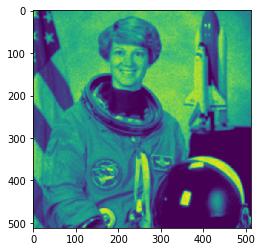

In [19]:
gauss_blur = cv2.GaussianBlur(noisyImage,(7,7),0)
plt.imshow(gauss_blur, cmpa='gray')

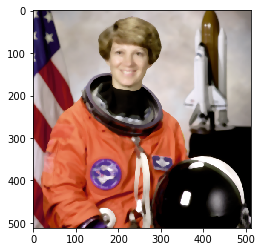

In [26]:
t=data.astronaut()
#noisyImage.reshape(*noisyImage.shape,1)
#t.shape
median_blur = cv2.medianBlur(t,7)
plt.imshow(median_blur,cmap='gray')

In [39]:
ksize = 9
kernel = np.ones((ksize,ksize))
kernel = 1./(ksize*ksize)*kernel

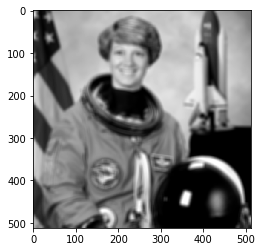

In [40]:
filtered = cv2.filter2D(astro,-1,kernel)

plt.imshow(filtered, cmap='gray')

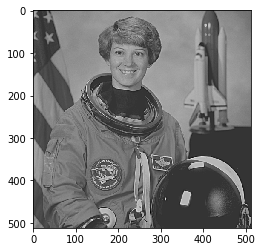

In [44]:
ALPHA = 1

kernel = cv2.getGaussianKernel(ksize,0)
kernel = -ALPHA*kernel @ kernel.T
kernel[ksize//2,ksize//2] += 1+ALPHA

filtered = cv2.filter2D(astro,-1,kernel)

plt.imshow(filtered, cmap='gray')

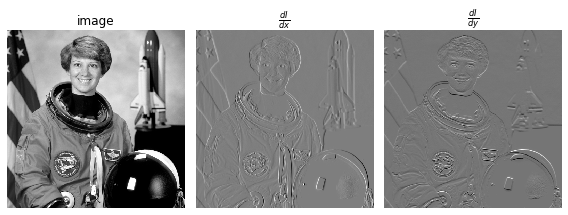

In [52]:
dx = cv2.Sobel(astro,cv2.CV_64F,1,0) #32-bit floating-point numbe
dy = cv2.Sobel(astro,cv2.CV_64F,0,1)

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(astro,cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title(r'$\frac{dI}{dx}$')
plt.imshow(dx,cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title(r'$\frac{dI}{dy}$')
plt.imshow(dy,cmap='gray')

plt.tight_layout()
plt.show()

In [46]:
cv2.Sobel?

Docstring:
Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
.   
.   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
.   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
.   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
.   or the second x- or y- derivatives.
.   
.   There is also the special value `ksize = #CV_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
.   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
.   
.   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
.   
.   for the x-derivative, or transposed for the y-derivative.
.   
.   The function calculates an image derivative by convolving the image with the appropriate ke

In [47]:
astro.dtype

dtype('float64')